In [1]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204,0.233,0.518,0.090,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.197,0.209,0.499,0.169,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162,0.536,0.267,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138,0.116,0.434,0.362,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.151,0.151,0.483,0.223,41,1280,1321


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
Data = bike[['cnt', 'temp']]
Data.describe() #요약통계량

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


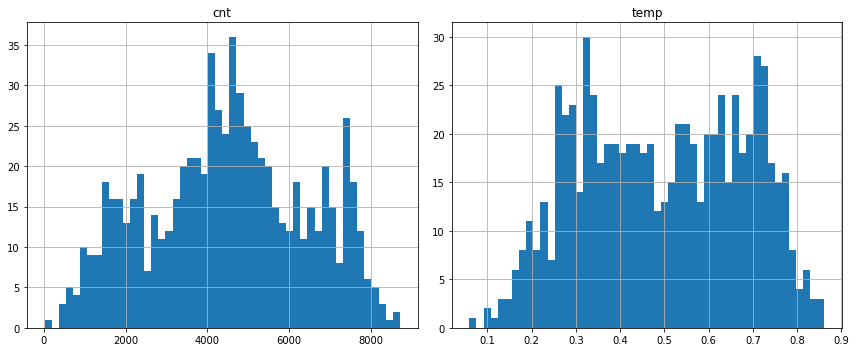

In [5]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

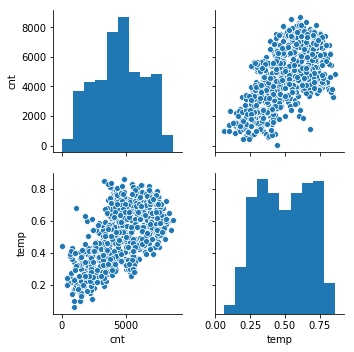

In [6]:
sns.pairplot(Data)

Polynomial Regression

In [7]:
data = Data.sample(n=50).reset_index()

In [8]:
N = data.shape[0]
test = np.random.choice(np.arange(N), 20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(30, 3) (20, 3)


In [9]:
# Matrix transformation
y = np.matrix(data['cnt']).T
X = np.matrix(Data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
from sklearn.metrics import mean_squared_error
trainMSE = np.linspace(0,0,12)
testMSE = np.linspace(0,0,12)
for i in range(1, 13):
    poly = PolynomialFeatures(degree=i) #몇차식?
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lin = LinearRegression(fit_intercept=False) #intercept가 앞에서 들어갔기 때문에 false
    lin.fit(X_train_poly, y_train)
    trainMSE[i-1] = np.log(mean_squared_error(y_train, lin.predict(X_train_poly))) #파이썬이 0부터 시작하기 때문에 -1
    testMSE[i-1] = np.log(mean_squared_error(y_test, lin.predict(X_test_poly)))
print(trainMSE, testMSE)

[14.413 14.401 14.379 14.379 14.373 14.337 14.332 14.297 14.22  14.219
 14.19  14.164] [14.538 14.432 14.384 14.387 14.344 14.492 14.385 15.012 16.37  16.307
 17.3   16.024]


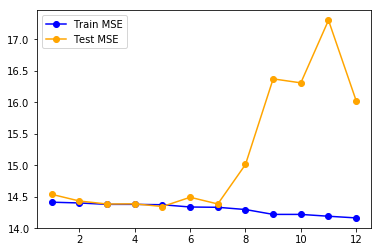

In [12]:
plt.plot(range(1, 13),trainMSE, 'o-', color='blue', label = 'Train MSE')
plt.plot(range(1, 13),testMSE, 'o-' ,color='orange', label = 'Test MSE')
plt.legend()